## NAME: Souri Rishik Volety
## Reg No: 230968004

## Question 1

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers, callbacks
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

2025-10-09 10:01:25.415001: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-09 10:01:25.425342: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759984285.437317   25899 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759984285.441139   25899 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759984285.450377   25899 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)   

Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


In [4]:
def build_autoencoder():
    input_img = layers.Input(shape=(32, 32, 3))

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    return autoencoder

In [5]:
autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

2025-10-09 10:01:28.697318: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-10-09 10:01:28.697338: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:167] env: CUDA_VISIBLE_DEVICES="-1"
2025-10-09 10:01:28.697354: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] CUDA_VISIBLE_DEVICES is set to -1 - this hides all GPUs from CUDA
2025-10-09 10:01:28.697357: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-10-09 10:01:28.697360: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: computinglab26-04
2025-10-09 10:01:28.697362: I external/local_xla/xla/stream_executor/

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/20
  2/391 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - loss: 0.0645  

2025-10-09 10:01:30.445219: E tensorflow/core/util/util.cc:131] oneDNN supports DT_INT32 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.0104 - val_loss: 0.0056
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.0035 - val_loss: 0.0041
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 12/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 

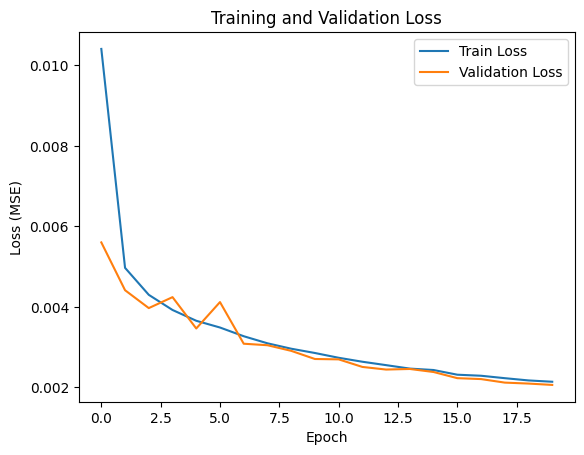

In [7]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


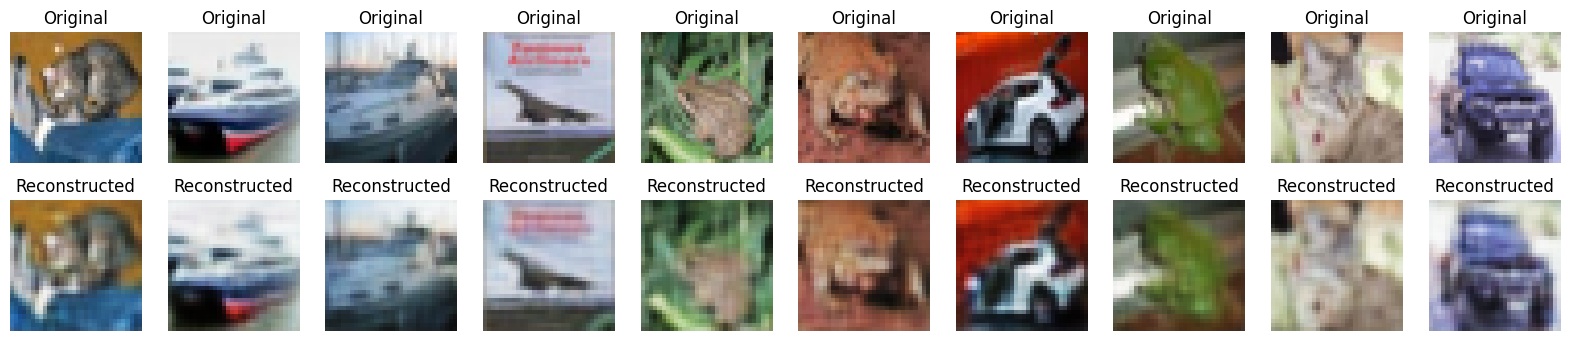

In [8]:
decoded_imgs = autoencoder.predict(x_test)

def show_reconstructions(x_true, x_pred, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):

        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_true[i])
        plt.title("Original")
        plt.axis("off")

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(x_pred[i])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()

show_reconstructions(x_test, decoded_imgs)

## Question 2

In [9]:
noise_factor = 0.2

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy  = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy  = np.clip(x_test_noisy, 0., 1.)

In [11]:
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=15,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 9/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 10/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 11/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 12/15
391/391 ━━━━━━━━━━

In [12]:
loss = autoencoder.evaluate(x_test_noisy, x_test)
print("Test MSE Loss:", loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0043
Test MSE Loss: 0.004286705516278744


In [14]:
x_test_denoised = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


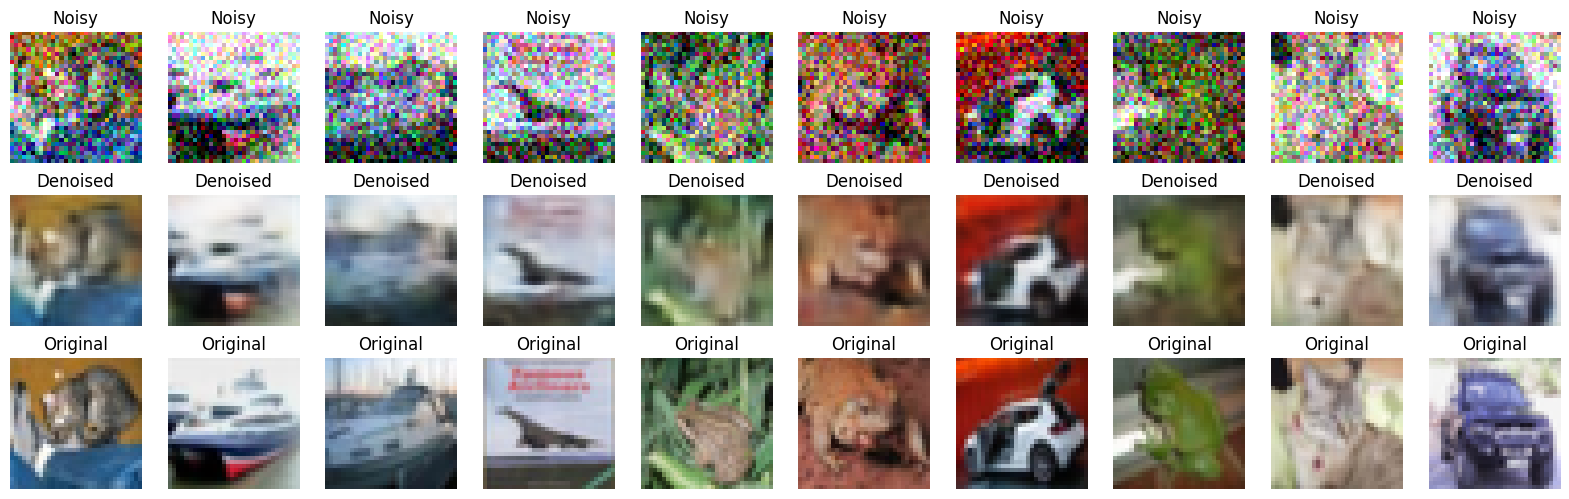

In [15]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_denoised[i])
    plt.title("Denoised")
    plt.axis('off')

    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')
plt.show()